<h3 style='text-align: right;'>2023.12.24</h3>
<h3 style='text-align: right;'>Team Kim & Be & Kim</h3>

# Contents
- **Introduction**
    - Problem Definition and Data Description
- **Section1: EDA**
    - Exploratory Data Analysis and Visualization
- **Section2: Methodology**
    - Feature Engineering with Scalers and Transformations
    - Model Training
    - Experiments with Different Model Structures
- **Section3: Key Findings**
    - Model Outputs and Discussion

### Introduction
- **PROBLEM DEFINITION**  
Within the realm of factory manufacturing, diverse resources including labor, infrastructure, and electrical utilities are expended. Ensuring the optimal utilization of these resources is mandatory.  
**KEPCO (Korea Electric Power Corporation)** _(which is the provider of the dataset of the research)_ calculates electricity prices based on the maximum power demand. **The maximum power demand, also known as the peak demand,** refers to the power accumulated in a predetermined time unit through transformers installed in a factory. Maximum power demand is calculated to be prepared for scenarios like facility failures and the sudden use of high-capacity equipment. This calculation involves finding the average power over a predetermined specific time period. In the case of KEPCO, this time period is 15 minutes.  
KEPCO monitors the three-month maximum power demand pattern and charges electricity fees by applying the base rate for the next year based on the highest maximum demand power. Therefore, it is important to efficiently manage the maximum demand power from the perspective of the company. If the maximum demand power increases, it leads to an increase in operating costs and acts as a factor in increasing the cost of the company.
- **DATA DESCRIPTION**  
The dataset, provided by KEPCO, is collected from the transformer detection sensors of a factory during the manufacturing process at **15-minute intervals.**
First, we should state that **15mins**, **30mins**, **45mins**, **60mins**, and **average** columns are the dependent variables and all the other columns are independent variables. The values in the dependent columns exhibit correlations with the values in the independent columns.  
Now, let us look at the meaning of each column.  
- **date** : Operation date, it starts with 1st of January, 2021 and goes until 14th of September, 2021  
- **hour** : Operation hour
- **15mins** : Maximum power usage for the first 15 minutes of the hour  
- **30mins** : Maximum power usage for the 15-30 minutes of the hour  
- **45mins** : Maximum power usage for the 30-45 minutes of the hour  
- **60mins** : Maximum power usage for the 45-60 minutes of the hour  
- **average** : Average of the 15mins, 30mins, 45mins, and 60mins values  
- **production** : Production value to be produced at the corresponding time  
- **temperature** : Temperature at the corresponding time  
- **wind_speed** : Wind speed at the corresponding time  
- **humidity** : Humidity at the corresponding time  
- **rainfall** : Amount of rainfall at the corresponding time  
- **electricity_bill_by_season** : Electricity bill for the season, it has 3 different values because the dates in the data contain only winter, spring, and summer seasons. This is because the dates in the data are until 14th of September.     
- **day_of_the_week** : It has values from 1 to 7 and these numbers represent the day of the week  
- **day** : It represents which day of the month it is  
- **month** : It represents which month of the year it is  
- **num_of_workers** : It represents the manpower that was used that day   
- **personnel_expenses** : Ratio of night and day labor costs  


## Section1: EDA

In [ ]:
import pandas as pd

df = pd.read_csv('./data/전기생산량.csv',parse_dates=True, index_col=0).reset_index()
df.head()

,날짜,시간,15분,30분,45분,60분,평균,생산량,기온,풍속,습도,강수량,전기요금(계절),day,d,m,공장인원,인건비
0,2021-01-01,0,62,61,61,61,61,0,-3.2,2.4,71,0.0,109.8,5,1,1,0.0,1.5
1,2021-01-01,1,96,93,116,113,105,0,-4.5,1.5,77,0.0,109.8,5,1,1,0.0,1.5
2,2021-01-01,2,106,96,106,107,104,0,-3.9,2.6,58,0.0,109.8,5,1,1,0.0,1.5
3,2021-01-01,3,92,110,110,109,105,0,-4.1,2.6,56,0.0,109.8,5,1,1,0.0,1.5
4,2021-01-01,4,108,105,106,108,107,0,-4.6,2.6,60,0.0,109.8,5,1,1,0.0,1.5


In [ ]:
new_column_names = [
    'date',
    'hour',
    '15mins',
    '30mins',
    '45mins',
    '60mins',
    'average',
    'production',
    'temperature',
    'wind_speed',
    'humidity',
    'rainfall',
    'electricity_bill_by_season',
    'day_of_the_week',
    'day',
    'month',
    'num_of_workers',
    'personnel_expenses'
]

df.columns = new_column_names
print('The number of columns in the dataset is:' , len(df.columns))
print('The number of rows in the dataset is:' , len(df))

The number of columns in the dataset is: 18
The number of rows in the dataset is: 6168


In [ ]:
df['y'] = df['date'].dt.year
df['m'] = df['date'].dt.month
df['d'] = df['date'].dt.day
df['day'] = df['date'].dt.dayofweek

In [ ]:
df_group_day = df.groupby('date').mean().reset_index()

In [ ]:
df_group_day.isnull().any()

date                          False
hour                          False
15mins                        False
30mins                        False
45mins                        False
60mins                        False
average                       False
production                    False
temperature                   False
wind_speed                    False
humidity                      False
rainfall                      False
electricity_bill_by_season    False
day_of_the_week               False
day                           False
month                         False
num_of_workers                False
personnel_expenses            False
y                             False
m                             False
d                             False
dtype: bool

### Visualization
First we visualized the daily 'average' value which is the average peak demand of electrity for everyday and the 'production' value. Both average and production exhibit a bimodal distribution, suggesting that the factor behind this might be related to date-specific characteristics, such as weekends and weekdays.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='average'>

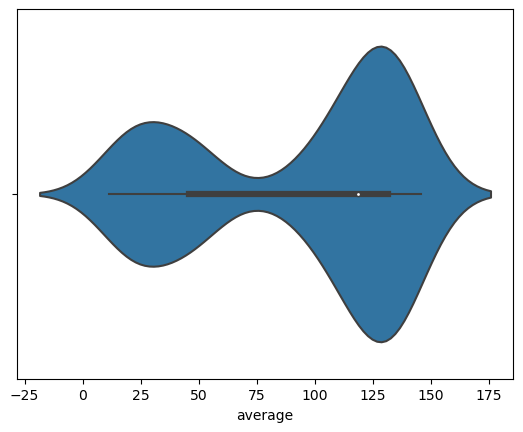

In [ ]:
sns.violinplot(data=df_group_day, x='average')

<Axes: xlabel='production'>

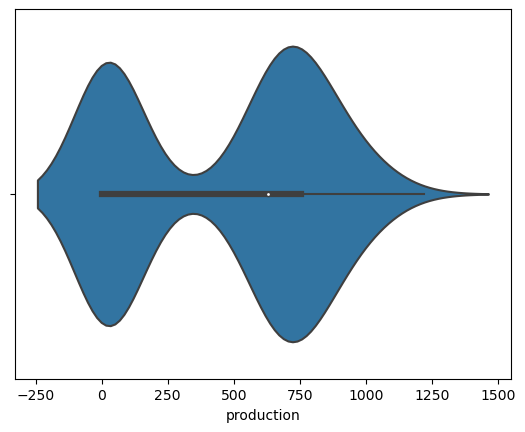

In [ ]:
sns.violinplot(data=df_group_day, x='production')

When visualized by categorizing into weekends and weekdays, it was observed that peak power consumption (average) and production quantity are lower on weekends and relatively higher on weekdays.

In [ ]:
df_group_day['part_of_the_week']=df_group_day.day.map(lambda x: 'Weekday' if x<5 else 'Weekend')

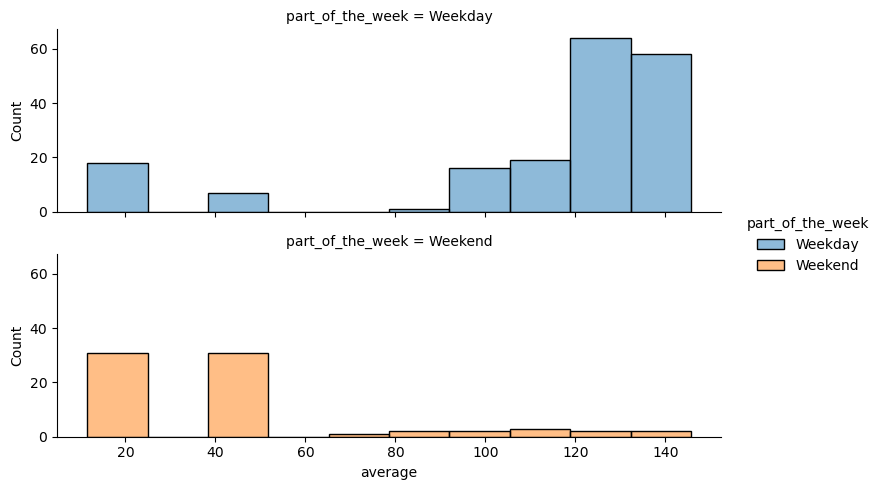

In [ ]:
sns.displot(data=df_group_day, x='average', row='part_of_the_week',hue='part_of_the_week', height=2.5, aspect=3)

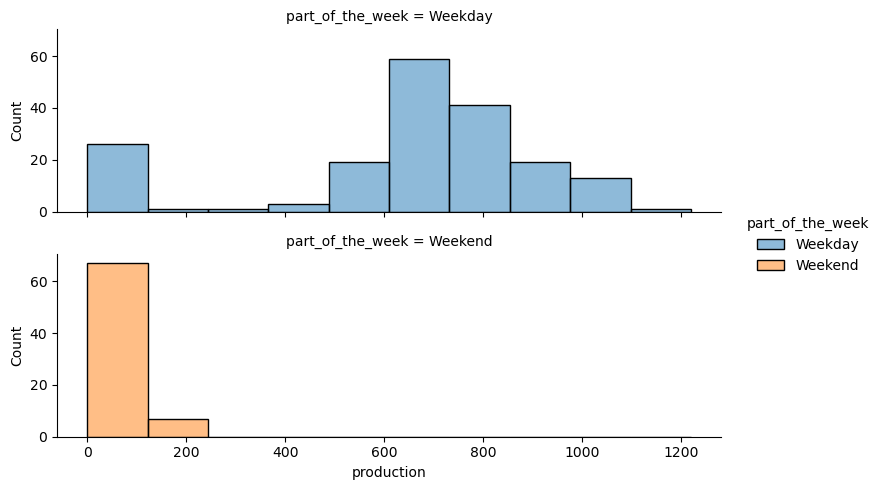

In [ ]:
sns.displot(data=df_group_day, x='production', row='part_of_the_week',hue='part_of_the_week', height=2.5, aspect=3)

We further explored if there are seasonal variations in peak power consumption and production quantity. The analysis revealed that there is not a significant difference in trends between seasonal variations.

In [ ]:
list_bill= df_group_day.electricity_bill_by_season.unique()
season_mapping = {
    list_bill[0]: 'Winter',
    list_bill[1]: 'Spring',
    list_bill[2]: 'Summer'
}

# Create the 'Seasons' column based on the mapping
df_group_day['season'] = df_group_day['electricity_bill_by_season'].map(season_mapping)

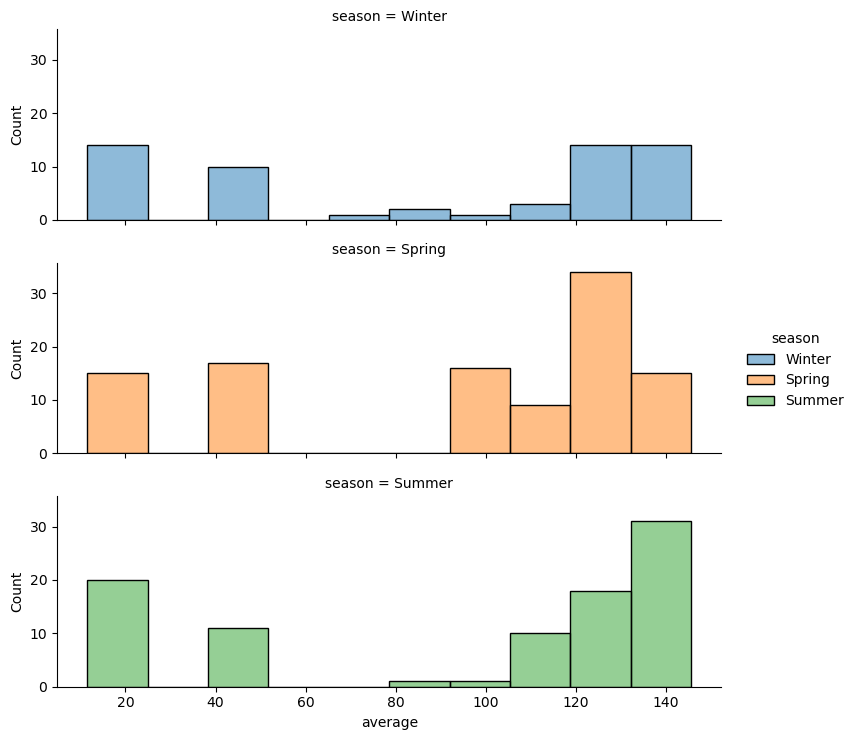

In [ ]:
sns.displot(data=df_group_day, x='average', row='season',hue='season', height=2.5, aspect=3)

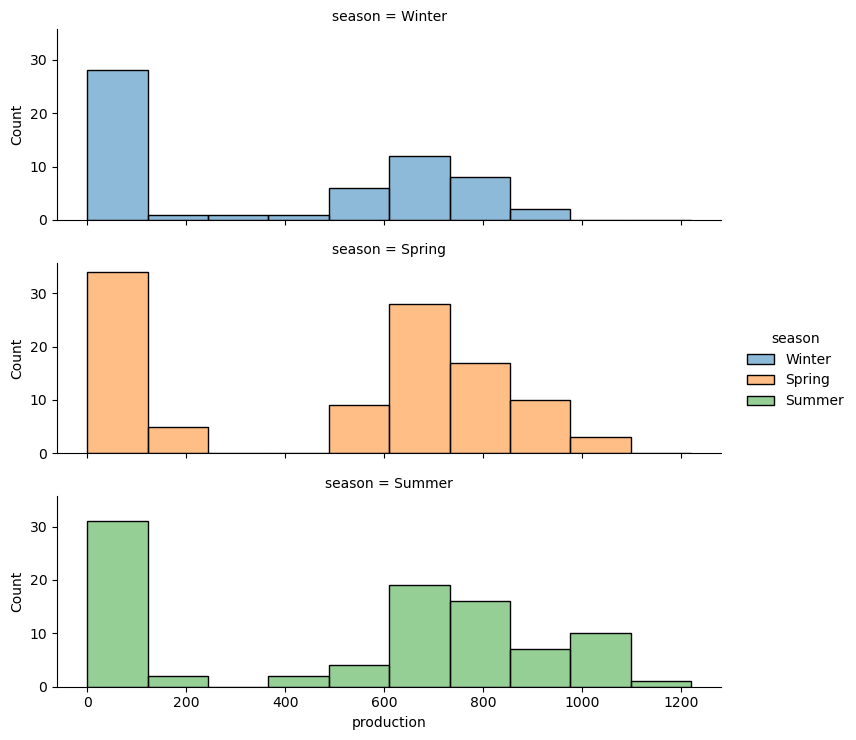

In [ ]:
sns.displot(data=df_group_day, x='production', row='season',hue='season', height=2.5, aspect=3)

**Correlation Matrix**

In [ ]:
from category_encoders import BinaryEncoder
bin_encoder = BinaryEncoder()
df_group_day['part_of_the_week_category'] = bin_encoder.fit_transform(df_group_day['part_of_the_week'])['part_of_the_week_0']


In [ ]:
df_features = df_group_day[['average','production','temperature', 'wind_speed','humidity','rainfall','num_of_workers','personnel_expenses','electricity_bill_by_season', 'part_of_the_week_category']]
df_group_day.columns

Index(['date', 'hour', '15mins', '30mins', '45mins', '60mins', 'average',
       'production', 'temperature', 'wind_speed', 'humidity', 'rainfall',
       'electricity_bill_by_season', 'day_of_the_week', 'day', 'month',
       'num_of_workers', 'personnel_expenses', 'y', 'm', 'd',
       'part_of_the_week', 'season', 'part_of_the_week_category'],
      dtype='object')

In [ ]:
df_features.corr()

,average,production,temperature,wind_speed,humidity,rainfall,num_of_workers,personnel_expenses,electricity_bill_by_season,part_of_the_week_category
average,1.000000,0.815524,0.004313,0.063178,-0.001651,-0.004609,0.434063,0.082570,0.073178,-0.659153
production,0.815524,1.000000,0.107522,-0.021969,0.023909,-0.001904,0.706062,-0.112221,0.160263,-0.737597
temperature,0.004313,0.107522,1.000000,-0.506863,0.643502,0.151971,-0.042747,0.116902,0.848649,0.025620
wind_speed,0.063178,-0.021969,-0.506863,1.000000,-0.508278,0.062766,0.044825,-0.086261,-0.418696,0.047659
humidity,-0.001651,0.023909,0.643502,-0.508278,1.000000,0.294203,-0.099297,0.071763,0.629817,0.038810
rainfall,-0.004609,-0.001904,0.151971,0.062766,0.294203,1.000000,-0.020338,-0.024111,0.162508,0.036946
num_of_workers,0.434063,0.706062,-0.042747,0.044825,-0.099297,-0.020338,1.000000,-0.082972,-0.042989,-0.511315
personnel_expenses,0.082570,-0.112221,0.116902,-0.086261,0.071763,-0.024111,-0.082972,1.000000,0.082884,-0.056316
electricity_bill_by_season,0.073178,0.160263,0.848649,-0.418696,0.629817,0.162508,-0.042989,0.082884,1.000000,-0.019528
part_of_the_week_category,-0.659153,-0.737597,0.025620,0.047659,0.038810,0.036946,-0.511315,-0.056316,-0.019528,1.000000


<Axes: >

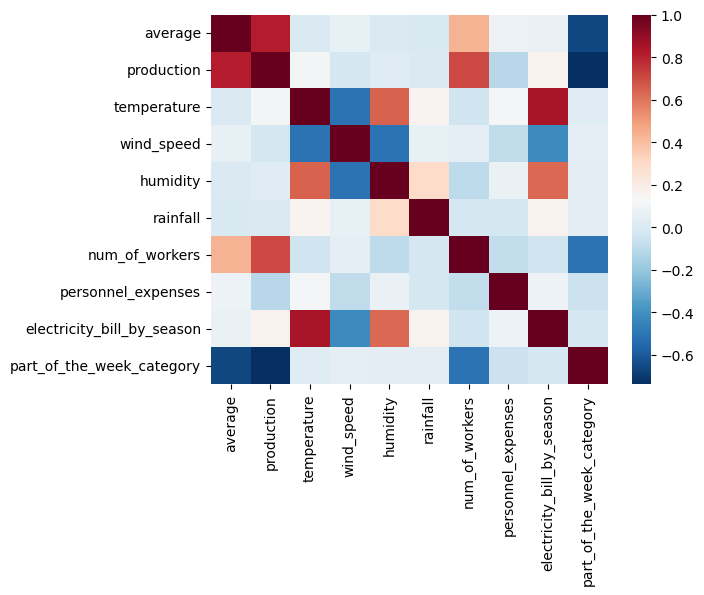

In [ ]:
sns.heatmap(df_features.corr(), cmap = 'RdBu_r')

We examined the correlation between peak power consumption and other features, a high correlation was observed with production quantity. The next highest correlation coefficient was found with the number of workers at 0.43.  
We utilized **production** for the model since other features did not show high correlation.

## Section2: Methodology
We visualized the distribution of all numerical variables in our dataset to see if any of them needed transformations or feature engineering in general.

In [ ]:
variable_list = ['production','temperature', 'wind_speed','humidity','rainfall','num_of_workers','personnel_expenses','electricity_bill_by_season']
len(variable_list)

8

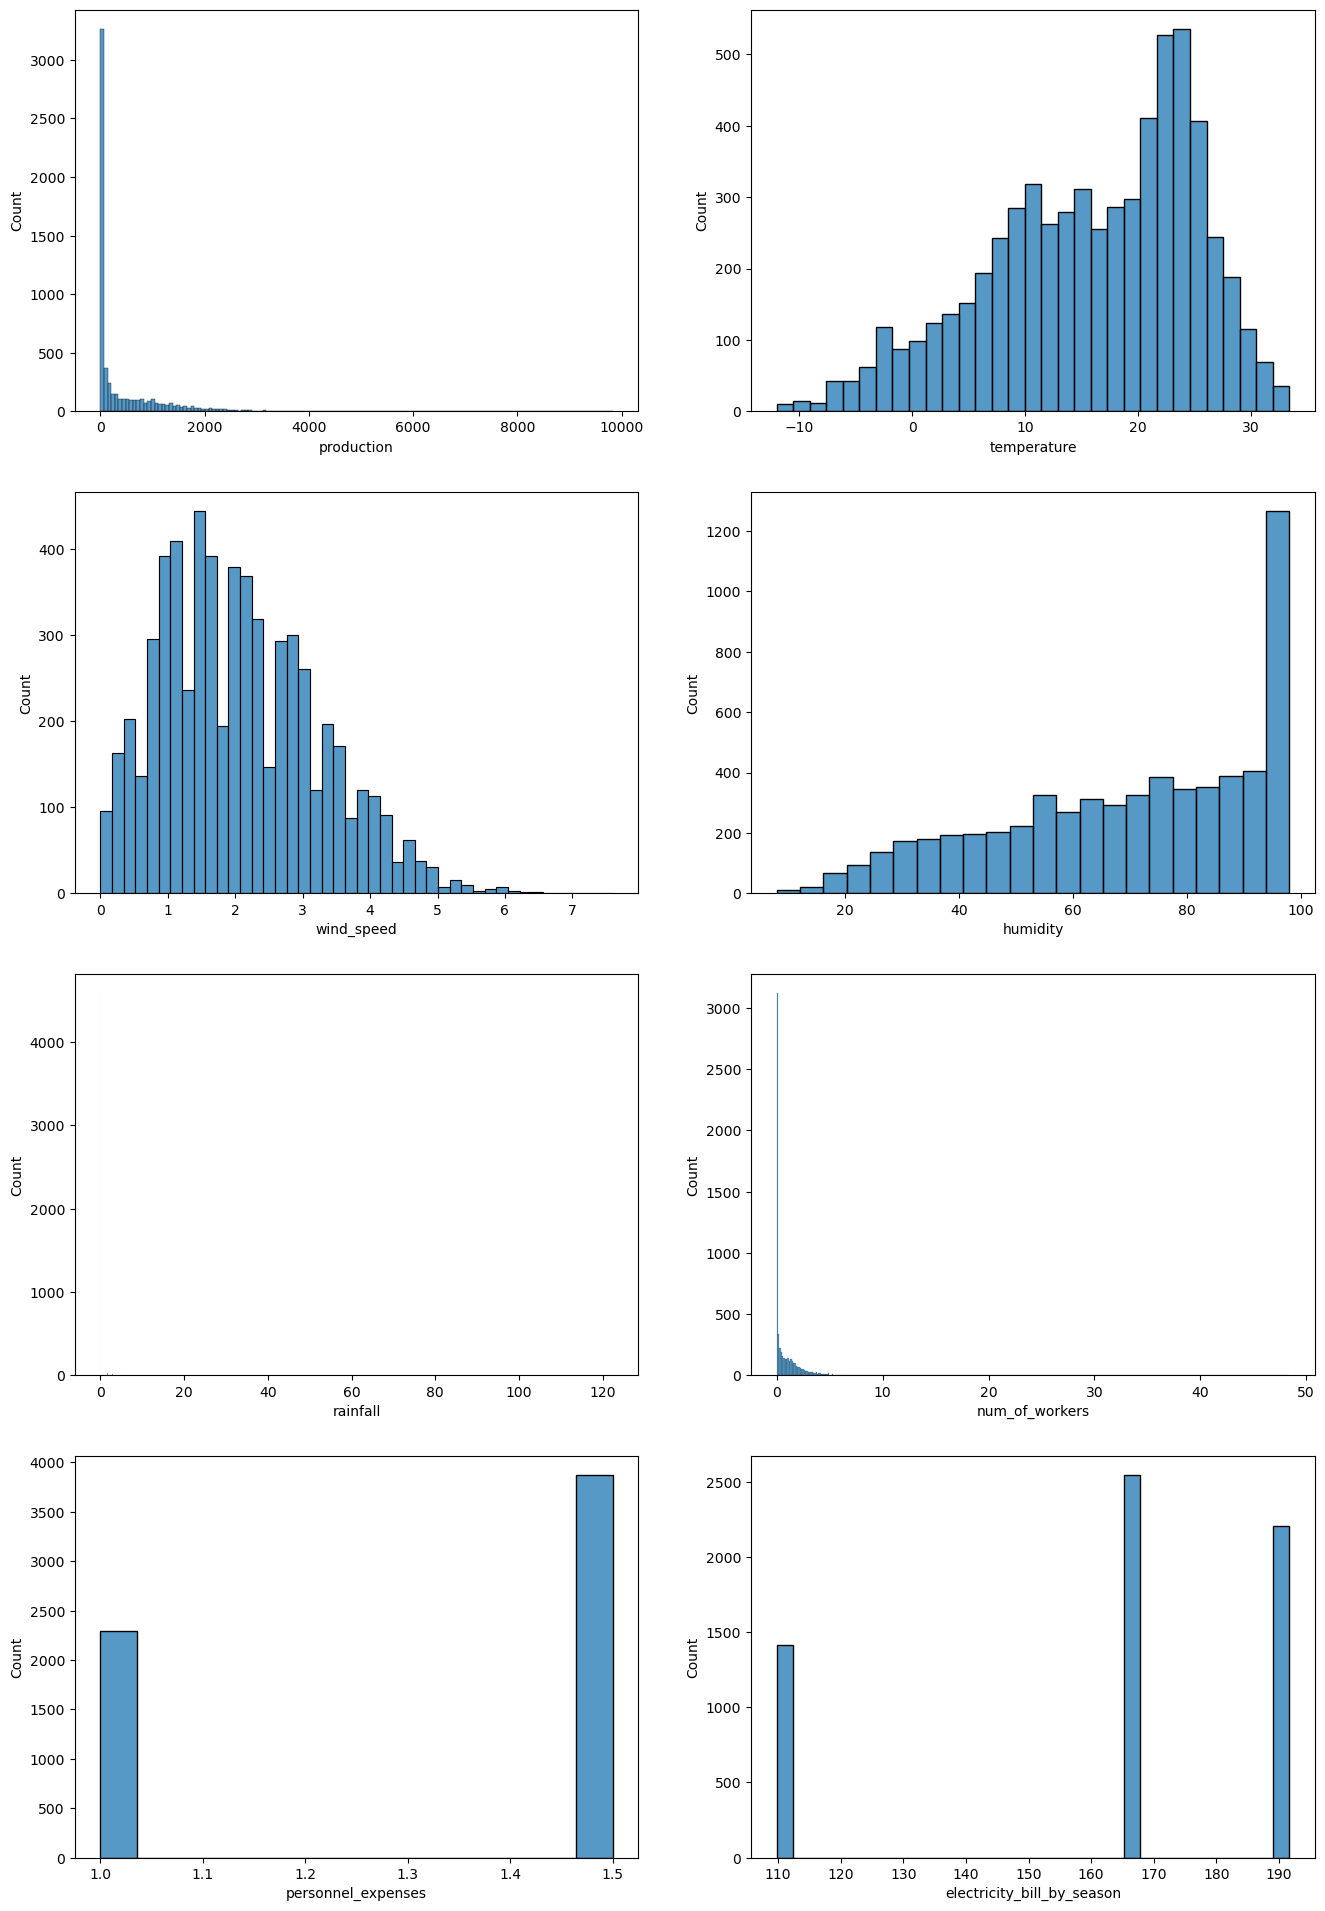

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))

for row in range(4):
    for col in range(2):
        idx = row * 2 + col

        if idx < len(variable_list):
            ax = axes[row][col]
            var = variable_list[idx]
            sns.histplot(data=df, x=var, ax=ax)
            ax.set(xlabel=var)

We applied binarization on the 'rainfall' data because of the distribution of the variable.  
If the rainfall for a day is over the threshold, the day is considered rainy and if it is below the threshold, it is considered not rainy.

<Axes: xlabel='rainfall'>

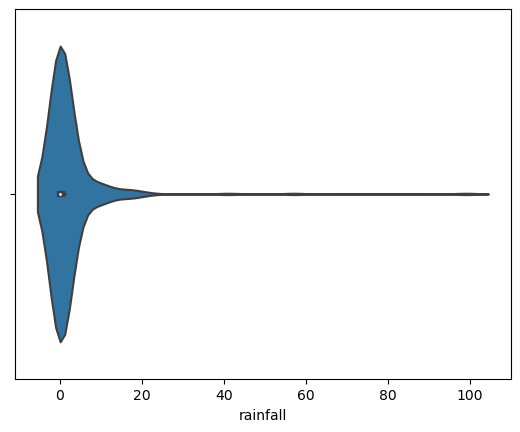

In [ ]:
# df['rainfall']
sns.violinplot(data=df_group_day, x='rainfall')

In [ ]:
df['rainfall'].describe()

count    6167.000000
mean        2.244252
std         9.613491
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max       122.400000
Name: rainfall, dtype: float64

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0001)
df_group_day['rainfall_bin']= binarizer.fit_transform(df_group_day[['rainfall']])

Text(0.5, 1.0, 'Count plot with the binarized data (threshold of 0.001)')

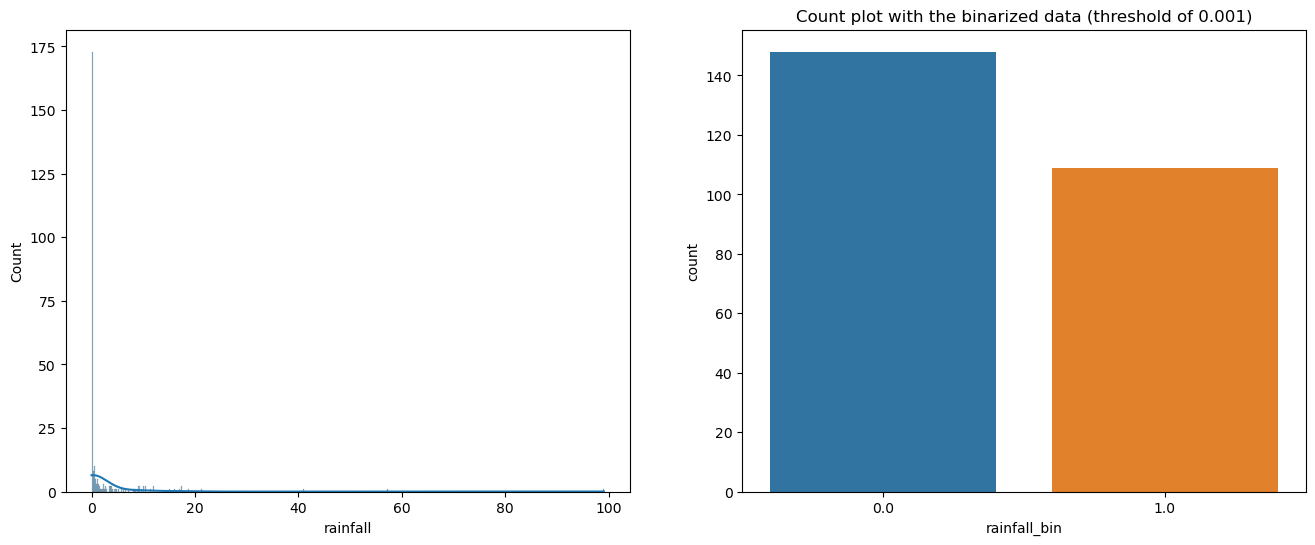

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=df_group_day, x='rainfall', ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.countplot(x=df_group_day['rainfall_bin'])
axes[1].set_title('Count plot with the binarized data (threshold of 0.001)')

### Train Validation Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = df_group_day[['temperature', 'wind_speed','humidity','rainfall','num_of_workers','personnel_expenses','electricity_bill_by_season']]
label = df_group_day['production']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size = 0.2, shuffle = True, random_state = 1)

In [ ]:
data.isnull().any()

temperature                   False
wind_speed                    False
humidity                      False
rainfall                      False
num_of_workers                False
personnel_expenses            False
electricity_bill_by_season    False
dtype: bool

### Feature Engineering
We tried different scaling methods and transformers on the variables like
- Robust Scaler  
- Standard Scaler
- Power Transformer
- Function Transformer  

For 'num_of_workers', we used Box-Cox Transformation but for the other variables  we used standard scaler to match the scale equally.

In [ ]:
def show_plot(x_train,x_val,x_test, col_name,trans_col_name,scale_name):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 15))

    ax = axes[0][0]
    a= sns.histplot(data=x_train, x=col_name, ax=ax)
    ax.set(xlabel=col_name, title = f'train dis before {scale_name} scaling')


    ax = axes[0][1]
    sns.histplot(data=x_test, x=col_name, ax=ax,)
    ax.set(xlabel=col_name, title = f'train dis before {scale_name} scaling')

    ax = axes[1][0]
    sns.histplot(data=x_train, x=trans_col_name, ax=ax, )
    ax.set(xlabel=col_name, title = f'train dis after {scale_name} scaling') #WE SHOULD CHANGE THIS TO TEST


    ax = axes[1][1]
    sns.histplot(data=x_test, x=trans_col_name, ax=ax, )
    ax.set(xlabel=col_name, title = f'train dis after {scale_name} scaling') #WE SHOULD CHANGE THIS TO TEST

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [ ]:
rb_scaler = RobustScaler()
std_scaler = StandardScaler()
pw_scaler = PowerTransformer()
log_scaler = FunctionTransformer(np.log)

In [ ]:
col_name = 'num_of_workers'
trans_col_name = 'num_of_workers_rb'
x_train[trans_col_name]= rb_scaler.fit_transform(x_train[[col_name]])
x_test[trans_col_name]= rb_scaler.transform(x_test[[col_name]])

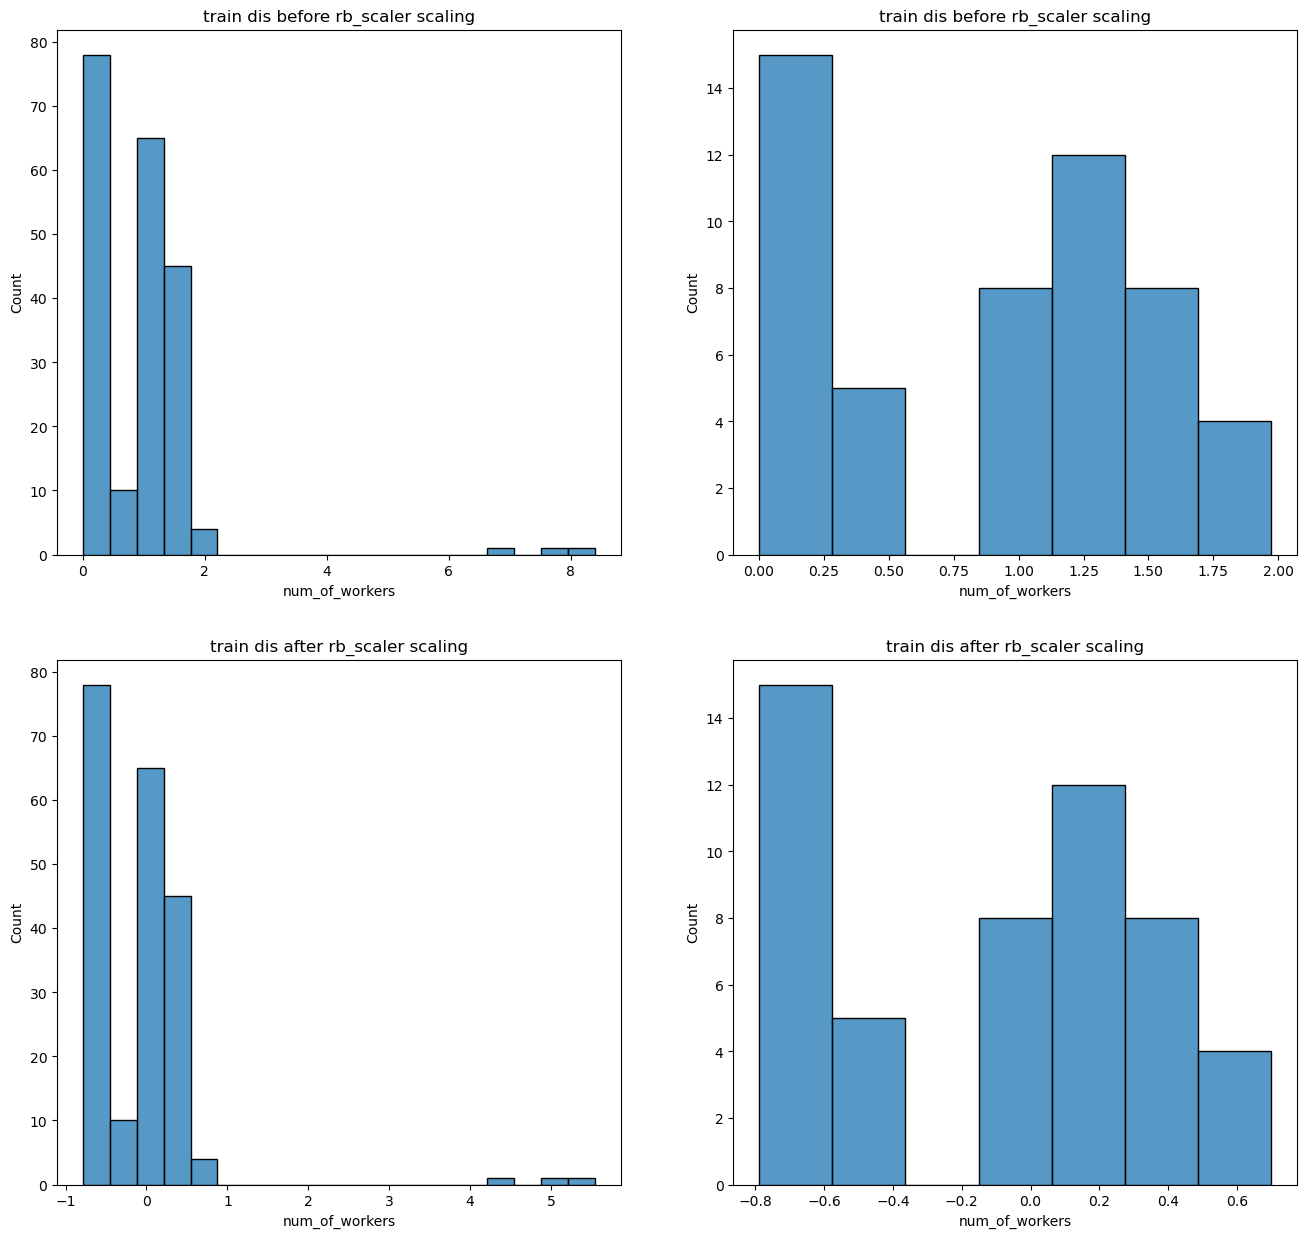

In [ ]:
show_plot(x_train,x_val,x_test, col_name,trans_col_name, 'rb_scaler')

In [ ]:
trans_col_name = 'num_of_workers_std'
x_train[trans_col_name]= std_scaler.fit_transform(x_train[[col_name]])
x_test[trans_col_name]= std_scaler.transform(x_test[[col_name]])

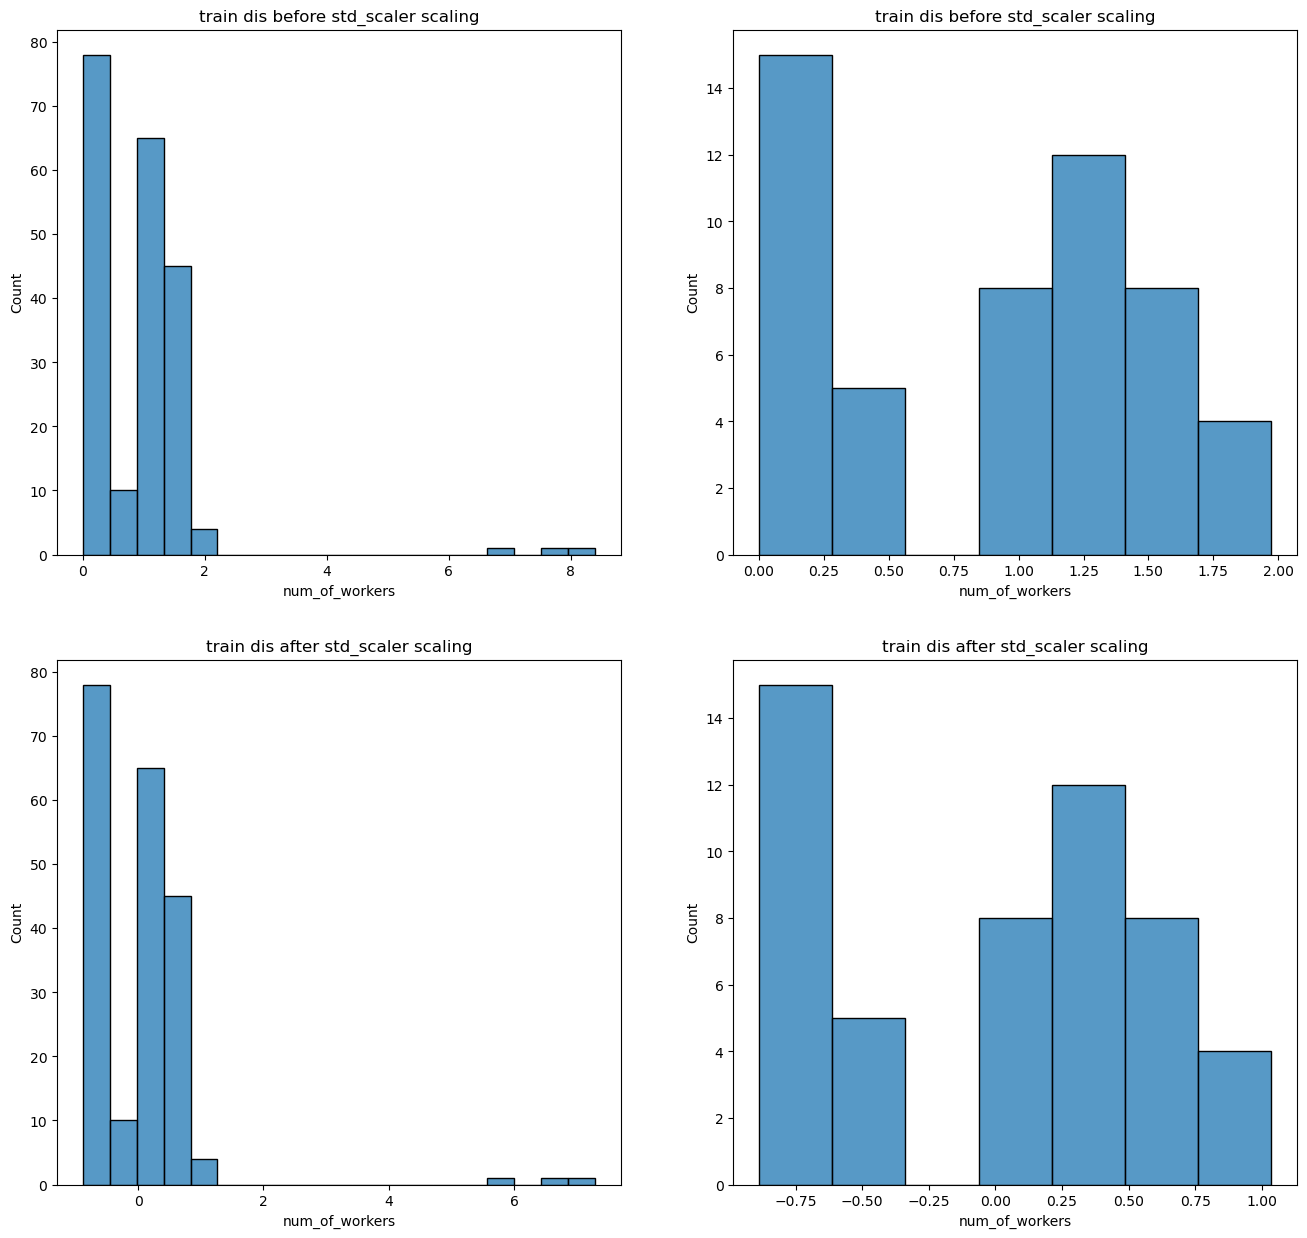

In [ ]:
show_plot(x_train,x_val,x_test, col_name,trans_col_name, 'std_scaler')

In [ ]:
trans_col_name = 'num_of_workers_pw'
x_train[trans_col_name]= pw_scaler.fit_transform(x_train[[col_name]])
x_test[trans_col_name]= pw_scaler.transform(x_test[[col_name]])

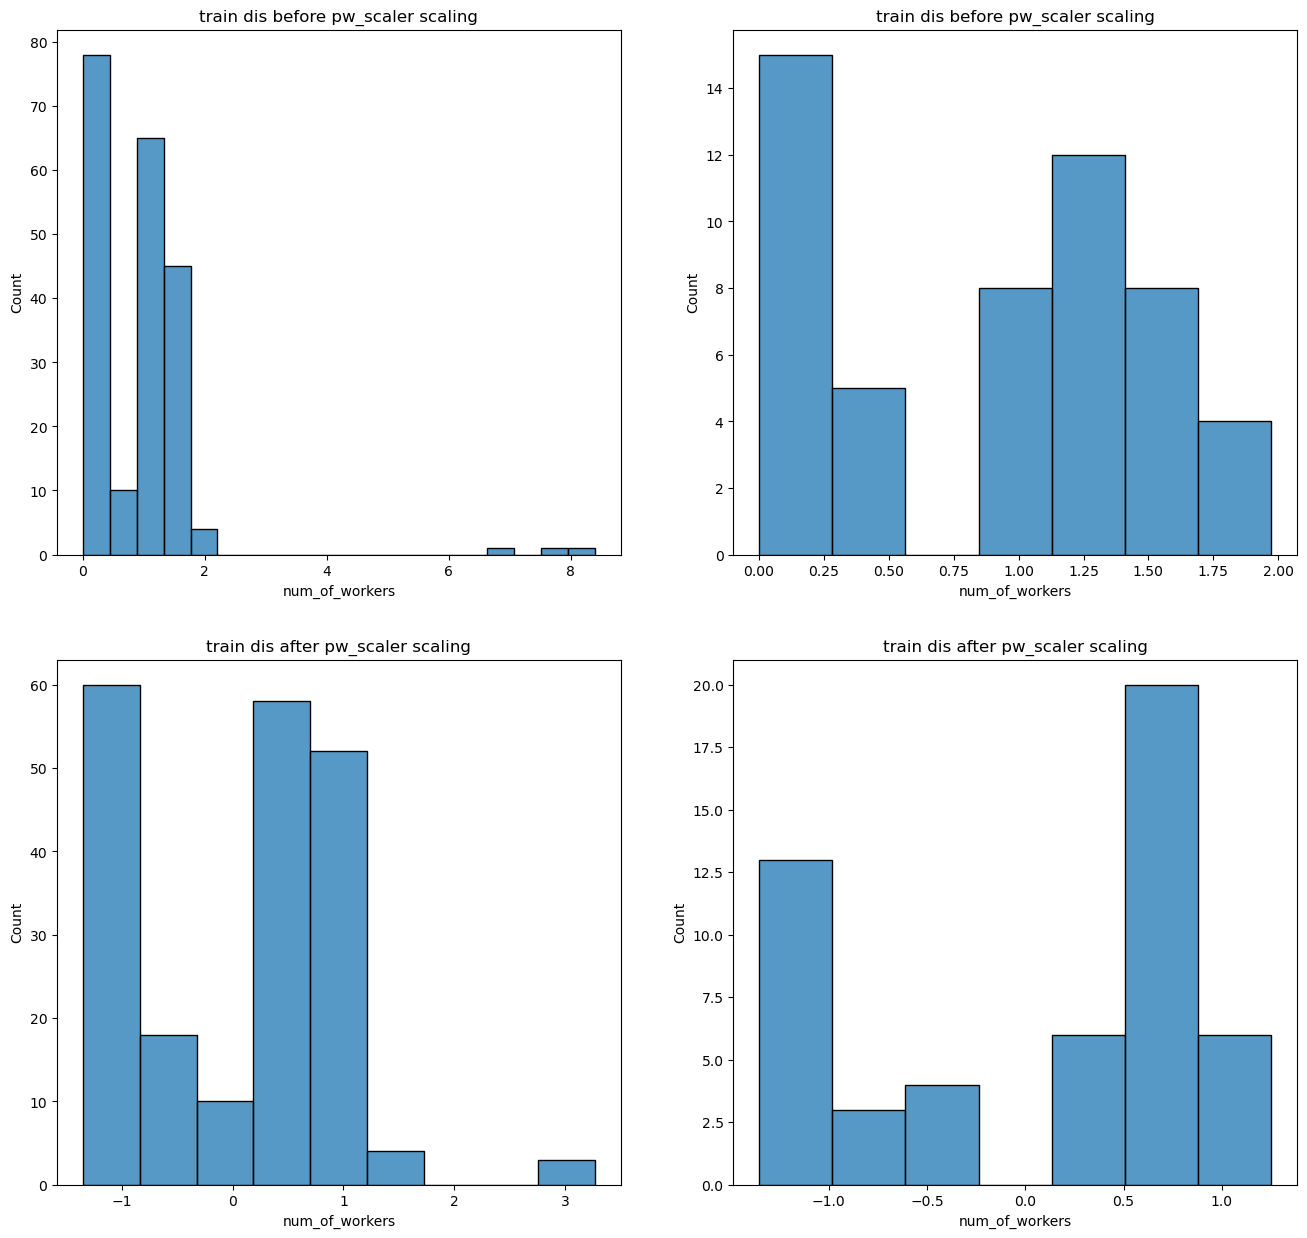

In [ ]:
show_plot(x_train,x_val,x_test, col_name,trans_col_name, 'pw_scaler')

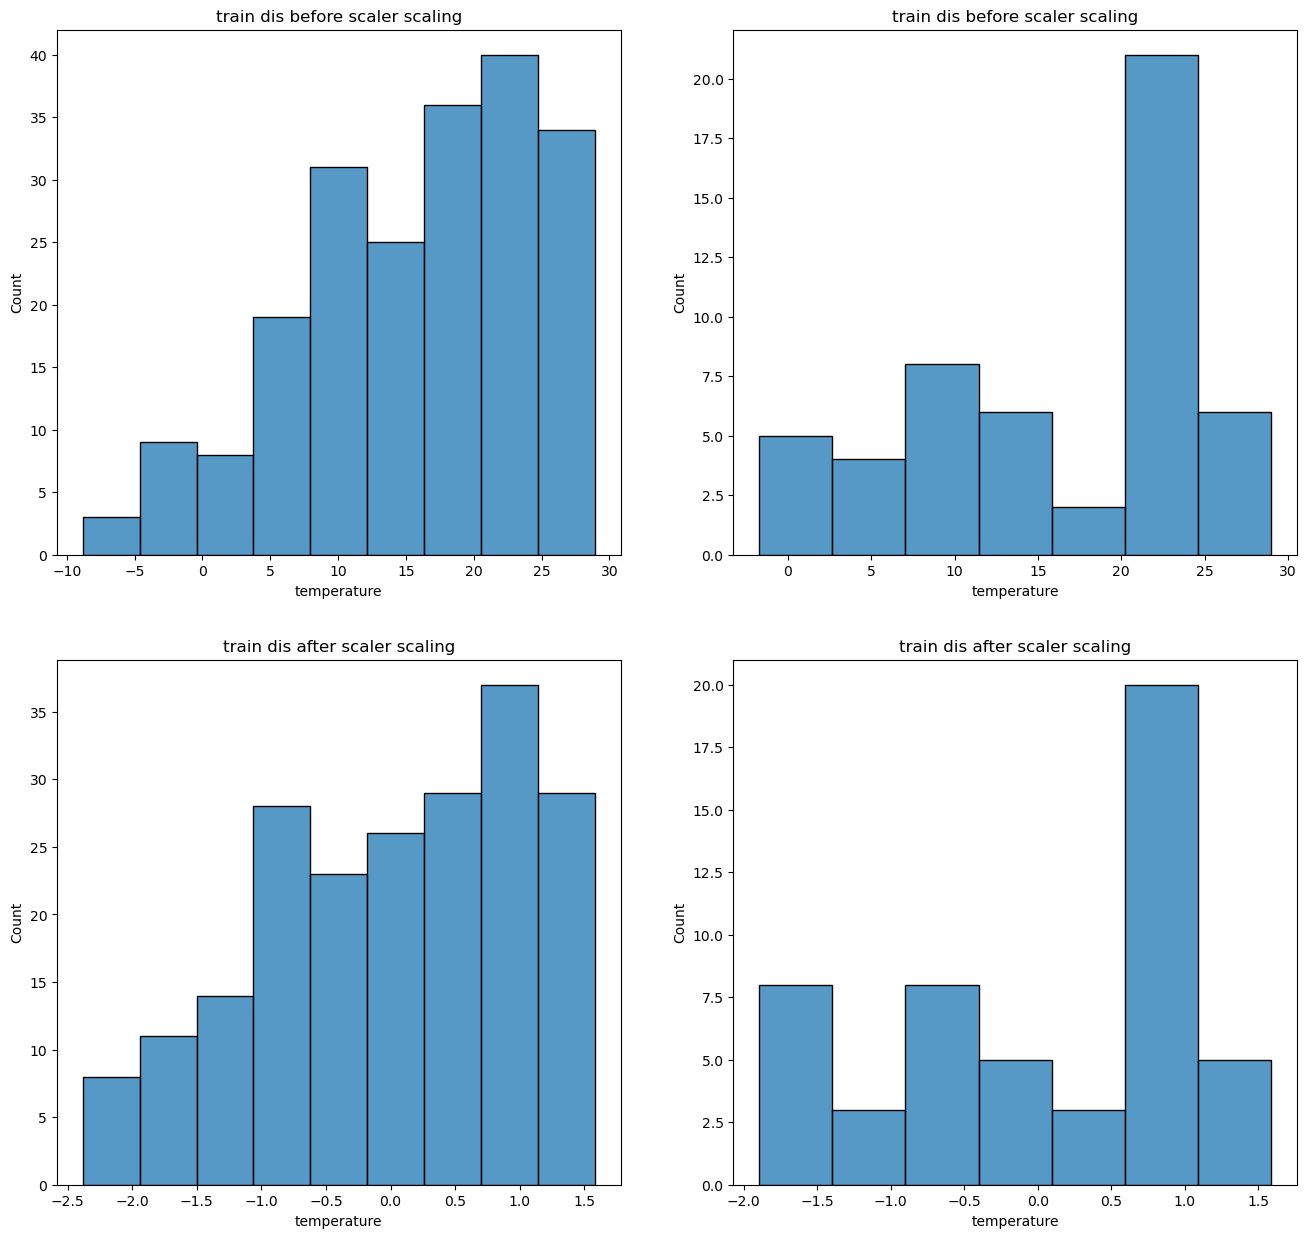

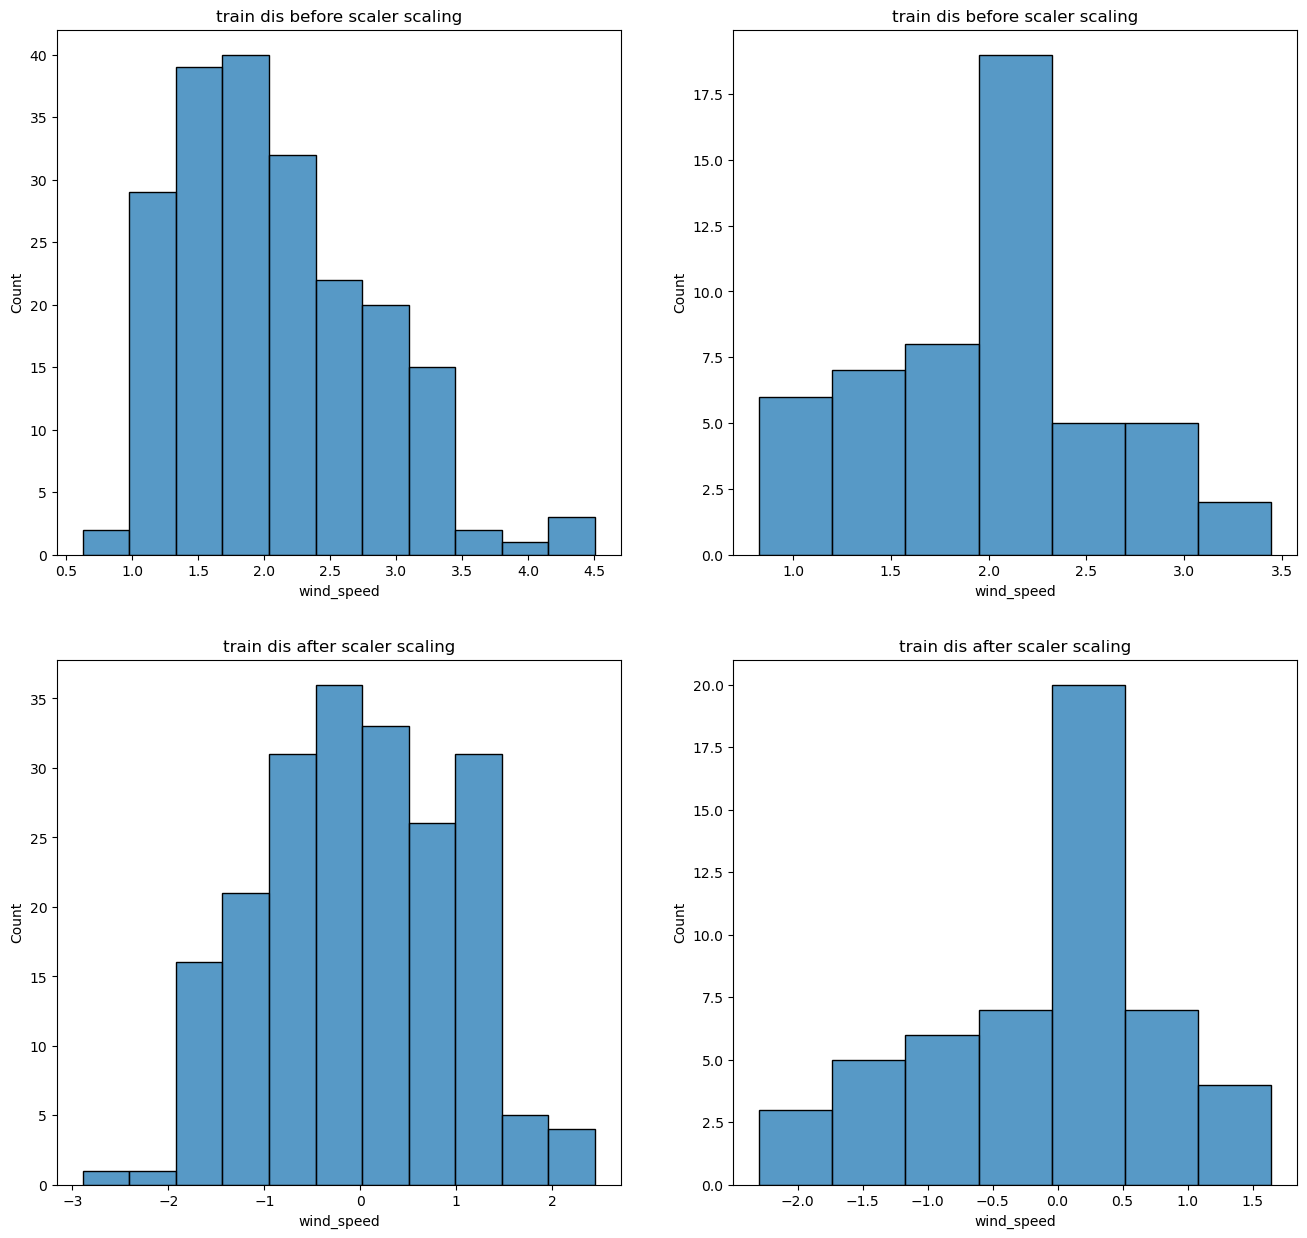

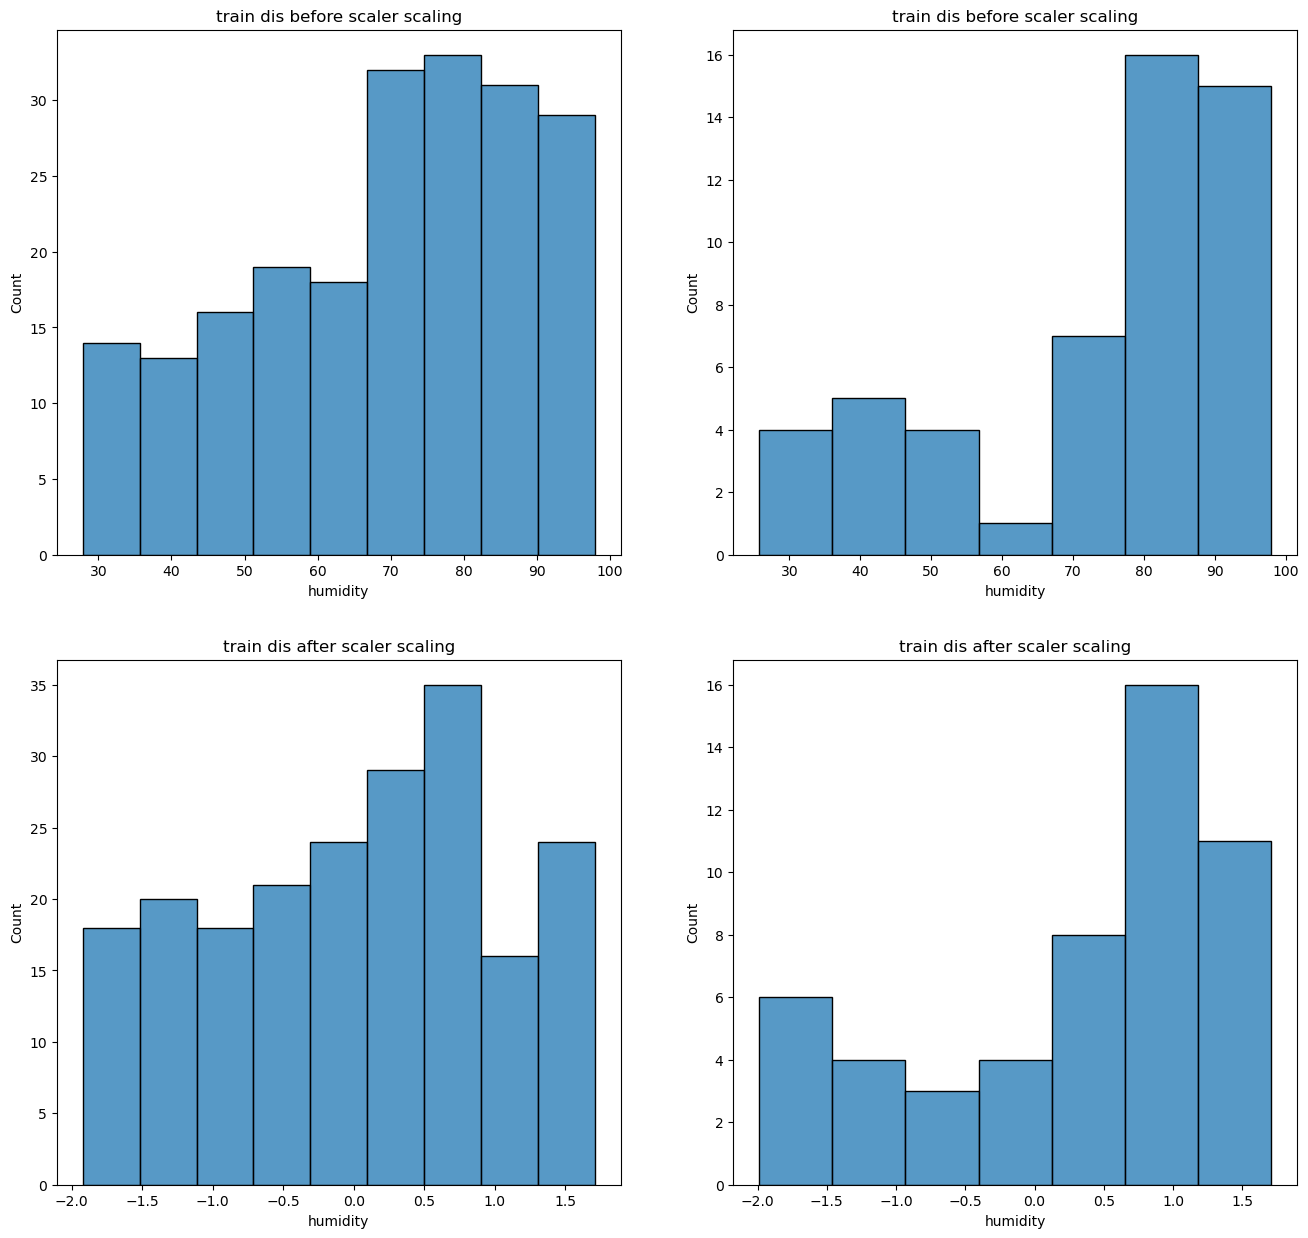

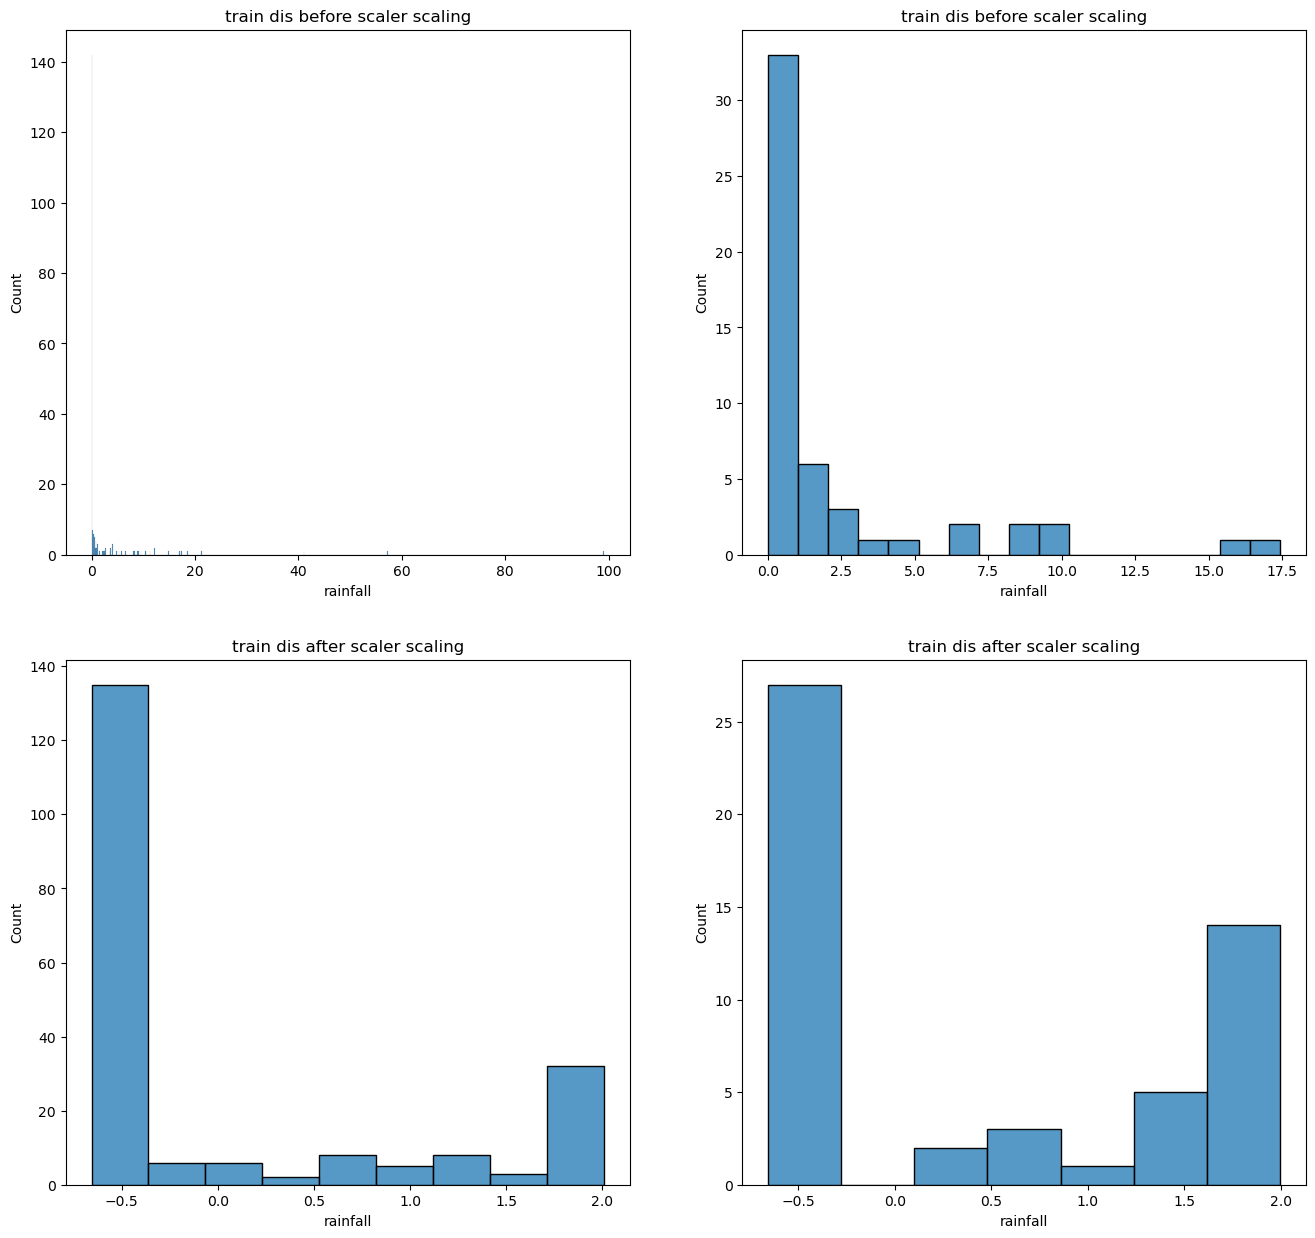

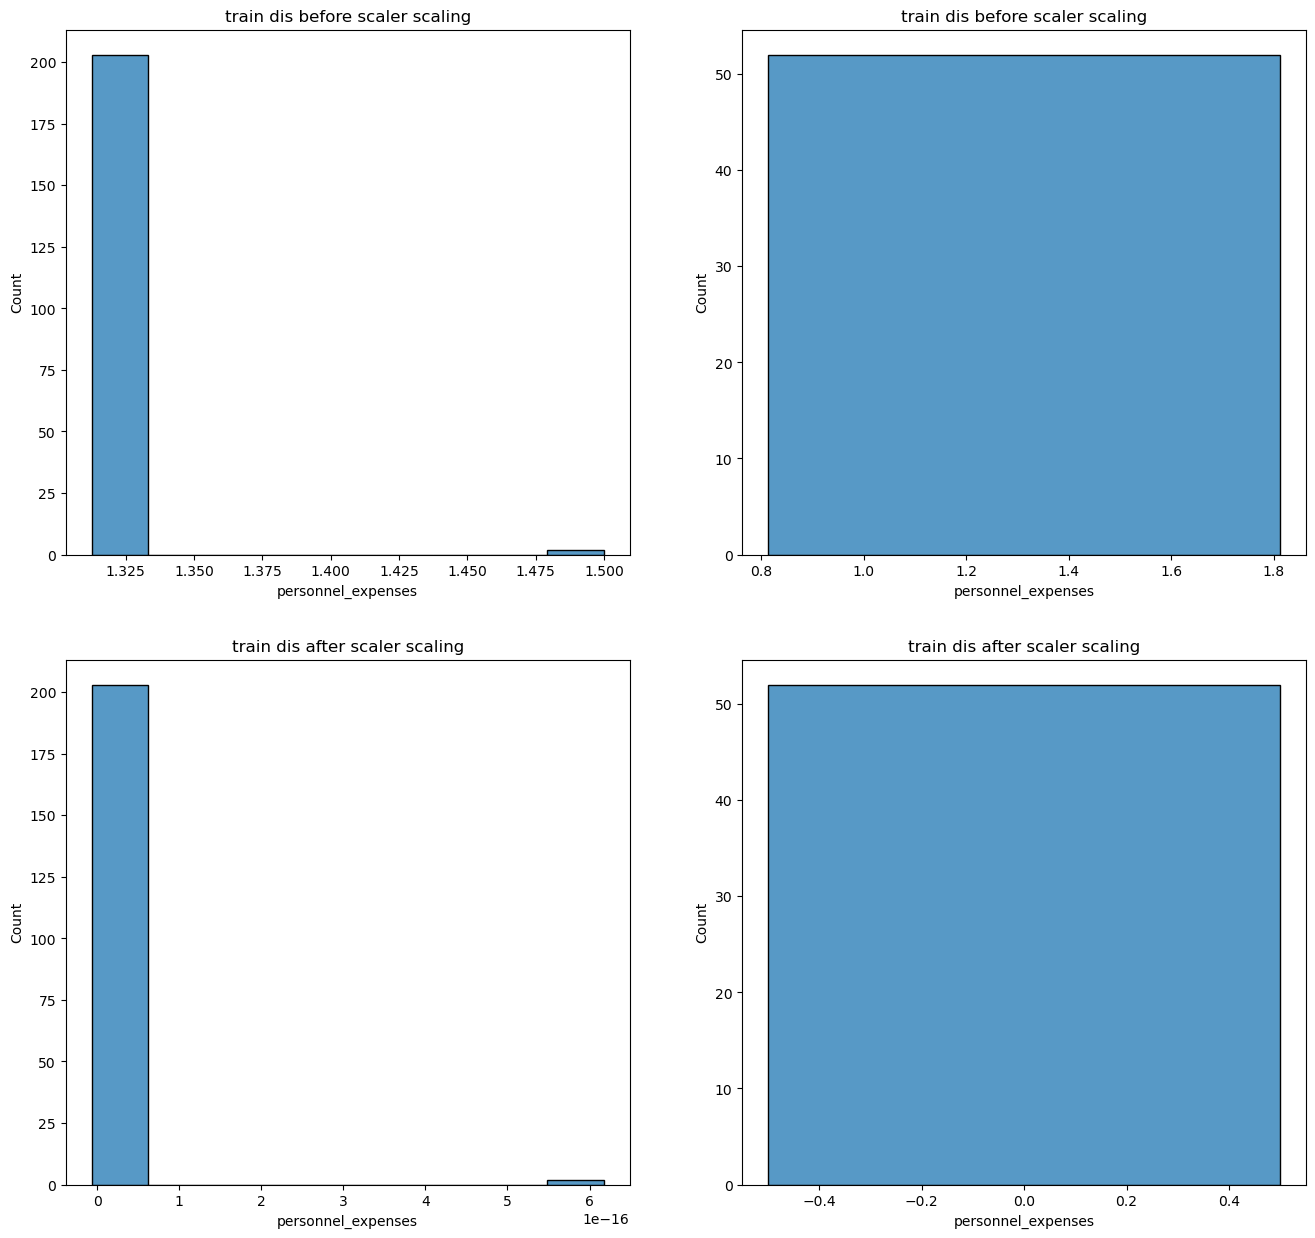

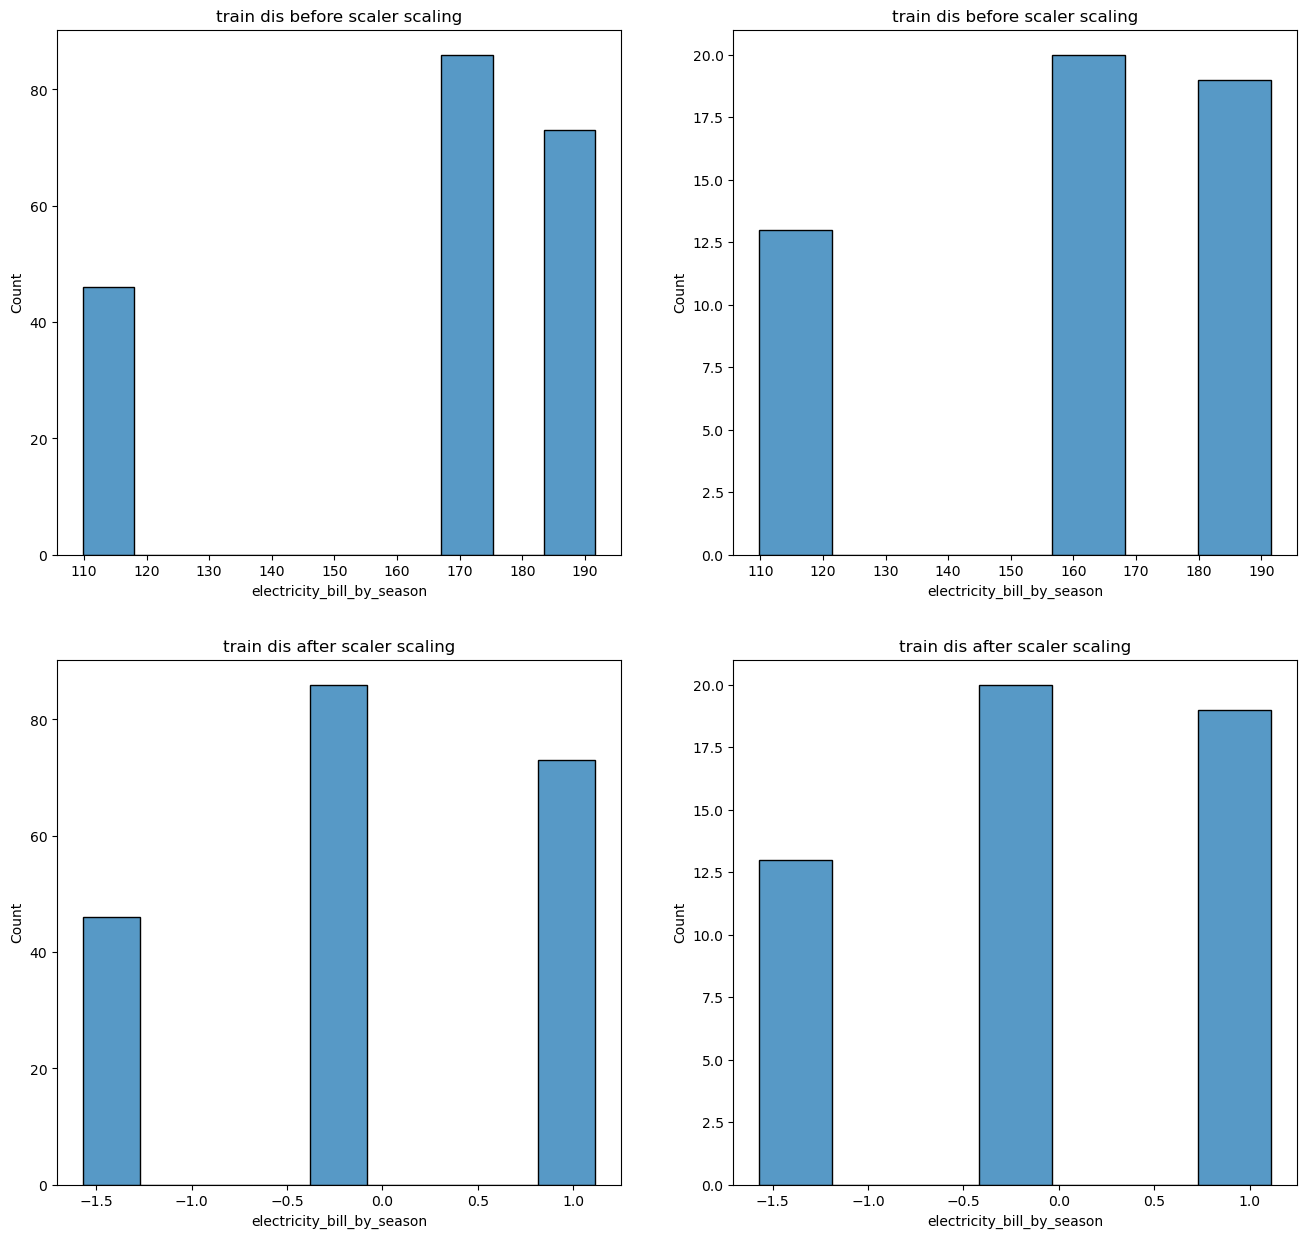

In [ ]:
var_list_wo_w = ['temperature', 'wind_speed','humidity','rainfall','personnel_expenses','electricity_bill_by_season']

for var in var_list_wo_w:
    col_name = var
    trans_col_name = f'{var}_std'

    std_scaler = StandardScaler()
    x_train[trans_col_name]= pw_scaler.fit_transform(x_train[[col_name]])
    x_test[trans_col_name]= pw_scaler.transform(x_test[[col_name]])

    show_plot(x_train,x_val,x_test, col_name,trans_col_name, 'scaler')

In [ ]:
# delete don't need col
list_ =['num_of_workers_pw','temperature_std', 'wind_speed_std', 'humidity_std', 'rainfall_std','personnel_expenses_std','electricity_bill_by_season_std']

x_train = x_train[list_]
x_test = x_test[list_]

x_train.head()

,num_of_workers_pw,temperature_std,wind_speed_std,humidity_std,rainfall_std,personnel_expenses_std,electricity_bill_by_season_std
35,3.145840,-1.288605,0.337753,-1.923041,-0.657076,-6.938894e-18,-1.570670
11,-1.355461,-1.756750,0.237122,-1.088218,-0.657076,-6.938894e-18,-1.570670
29,-0.985291,-1.572176,-0.078273,-1.411581,-0.657076,-6.938894e-18,-1.570670
0,-1.355461,-1.855290,0.115702,-0.700689,-0.657076,-6.938894e-18,-1.570670
159,0.574293,0.770427,-1.213102,-0.406787,-0.657076,-6.938894e-18,1.113821


### Model Training
**Model :**
- Linear Regression
- Linear Regression with Regularization
- Polynomial Regression  

**Batch strategy :**  
- Validation set
- Cross Validation set  

**HP search :**  
- L2 Regularization Alpha
- Degree of Polynomial  

**Metric :** MSE Loss
  
**Final Model :**
Linear Regression Model with 5-fold cross validation showed the lowest Validation Mean Squared Error loss value.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
# linear model with out k-fold
x_t, x_v, y_t, y_v = train_test_split(data,label,test_size = 0.2, shuffle = True, random_state = 1)

linear_model = LinearRegression()

linear_model.fit(x_t, y_t)
y_pred = linear_model.predict(x_v)
print(f'val MSE loss :{mean_squared_error(y_v, y_pred):.4f}')

val MSE loss :49773.5070


In [ ]:
# linear model with with k-fold
cv = KFold(n_splits=5, shuffle = True, random_state = 1)

mses_cv = []
for train_index, val_index in cv.split(x_train):
    x_cv_train, x_cv_val = x_train.iloc[train_index],x_train.iloc[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index],y_train.iloc[val_index]

    linear_model = LinearRegression()
    linear_model.fit(x_cv_train, y_cv_train)

    y_pred_cv = linear_model.predict(x_cv_val)
    mses_cv.append(mean_squared_error(y_cv_val, y_pred_cv))

print(np.array(mses_cv).shape)
print(f'val MSE CV: {np.array(mses_cv).mean():.4f}')

(5,)
val MSE CV: 17079.7969


In [ ]:
# linear regression with regularization

x_t, x_v, y_t, y_v = train_test_split(data,label,test_size = 0.2, shuffle = True, random_state = 1)

alpha_list = [0.1,0.5,1,1.5,2]
for t in alpha_list:
    linear_model = Ridge(alpha=t)

    linear_model.fit(x_t, y_t)
    y_pred = linear_model.predict(x_v)
    print(f'alpha : {t}')
    print(f'val MSE loss :{mean_squared_error(y_v, y_pred):.4f}')
    print('------------------------------------------------------------')


alpha : 0.1
val MSE loss :49777.9696
------------------------------------------------------------
alpha : 0.5
val MSE loss :49883.8762
------------------------------------------------------------
alpha : 1
val MSE loss :50021.2937
------------------------------------------------------------
alpha : 1.5
val MSE loss :50158.6509
------------------------------------------------------------
alpha : 2
val MSE loss :50295.7037
------------------------------------------------------------


In [ ]:
#polynomial
x_t, x_v, y_t, y_v = train_test_split(data,label,test_size = 0.2, shuffle = True, random_state = 1)

degree_list = [2,3,4,5]
for degree in degree_list:
    poly = PolynomialFeatures(degree=degree, include_bias=True)

    x_train_poly = poly.fit_transform(x_t)
    lin_reg = LinearRegression()
    lin_reg.fit(x_train_poly, y_t)

    x_test_poly = poly.transform(x_v)
    y_pred = lin_reg.predict(x_test_poly)

    print(f'degree : {degree}')
    print(f'val MSE loss :{mean_squared_error(y_v, y_pred):.4f}')
    print('------------------------------------------------------------')



degree : 2
val MSE loss :50326.1921
------------------------------------------------------------
degree : 3
val MSE loss :23257.8150
------------------------------------------------------------
degree : 4
val MSE loss :661855145493.6677
------------------------------------------------------------
degree : 5
val MSE loss :599984131.0433
------------------------------------------------------------


In [ ]:
# polinomial model with with k-fold

degree_list = [2,3,4,5,6]
for degree in degree_list:
    cv = KFold(n_splits=5, shuffle = True, random_state = 1)

    mses_cv = []
    for train_index, val_index in cv.split(x_train):
        x_cv_train, x_cv_val = x_train.iloc[train_index],x_train.iloc[val_index]
        y_cv_train, y_cv_val = y_train.iloc[train_index],y_train.iloc[val_index]

        poly = PolynomialFeatures(degree=degree, include_bias=True)

        x_train_poly = poly.fit_transform(x_cv_train)
        lin_reg = LinearRegression()
        lin_reg.fit(x_train_poly, y_cv_train)


        x_test_poly=poly.transform(x_cv_val)
        y_pred_cv = lin_reg.predict(x_test_poly)
        mses_cv.append(mean_squared_error(y_cv_val, y_pred_cv))

    print(f'degree : {degree}')
    print(f'val MSE CV: {np.array(mses_cv).mean():.4f}')
    print('------------------------------------------------------')

degree : 2
val MSE CV: 62711.2926
------------------------------------------------------
degree : 3
val MSE CV: 64962.2525
------------------------------------------------------
degree : 4
val MSE CV: 8467811.5172
------------------------------------------------------
degree : 5
val MSE CV: 2561213.3465
------------------------------------------------------
degree : 6
val MSE CV: 6031279.1600
------------------------------------------------------


### Section3: Key Findings
The graph is a scatter plot which compares Test labels and Predictions of the final Model that performed the best.  
We can see that Ground Truths and Predictions have a strong positive correlation.

In [ ]:
# linear model with with k-fold
cv = KFold(n_splits=5, shuffle = True, random_state = 1)

predict_dict = []

mses_cv = []
mses_cv_test = []
for idx, (train_index, val_index) in enumerate(cv.split(x_train)):
    x_cv_train, x_cv_val = x_train.iloc[train_index],x_train.iloc[val_index]
    y_cv_train, y_cv_val = y_train.iloc[train_index],y_train.iloc[val_index]

    linear_model = LinearRegression()
    linear_model.fit(x_cv_train, y_cv_train)

    y_pred_cv = linear_model.predict(x_cv_val)
    mses_cv.append(mean_squared_error(y_cv_val, y_pred_cv))

    y_pred_test = linear_model.predict(x_test)
    mses_cv_test.append(mean_squared_error(y_test, y_pred_test))
    if len(predict_dict) ==0:
        predict_dict = np.array([y_pred_test])
    else:
        predict_dict = np.concatenate((predict_dict, [y_pred_test]),axis=0)

print(f'val MSE CV: {np.array(mses_cv).mean():.4f}')
print(f'test MSE CV: {np.array(mses_cv_test).mean():.4f}')

val MSE CV: 17079.7969
test MSE CV: 10381.9755


In [ ]:
predict_dict.shape

(5, 52)

In [ ]:
y_pred = predict_dict.mean(axis=0)

In [ ]:
y_test

183      72.291667
34      600.458333
185     654.791667
233       0.000000
216       0.000000
181     764.708333
160     552.791667
27      576.250000
145     831.000000
187     808.625000
256     804.916667
62      604.166667
4         0.000000
229     835.958333
44        0.000000
163       0.000000
250     867.958333
51        0.000000
182     827.041667
255     590.583333
73      682.208333
99      127.291667
189     688.625000
226       0.000000
230    1082.333333
88     1008.833333
38      654.458333
243     818.250000
130     920.333333
245     535.208333
67      728.833333
12        0.000000
93        0.000000
78       54.041667
85       81.958333
213       0.000000
39      631.833333
248     692.833333
249     684.333333
236     919.833333
246     142.958333
231    1050.541667
120     116.333333
31      848.666667
18        0.000000
220     862.041667
168     682.333333
19        0.000000
238    1073.708333
58        0.000000
33      605.666667
106     124.083333
Name: produc

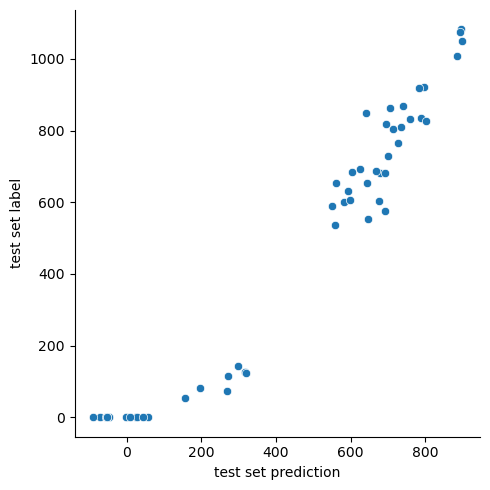

In [ ]:
p=sns.relplot(x=y_pred, y=y_test)
p.set(xlabel= "test set prediction", ylabel="test set label")